In [14]:
#Least Significant Bit
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [15]:
d={chr(i):i for i in range(255)}
c={i:chr(i) for i in range(255)}

In [16]:
#Message and encryption key
text="Cyber Security"
key="5353"

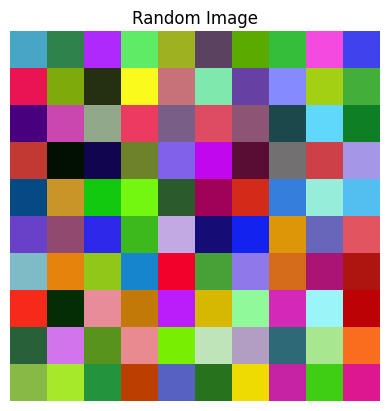

In [17]:
#Random pixel value image
x=np.random.randint(0,255,(10,10,3),dtype=np.uint8)
xrgb=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(xrgb)
plt.title("Random Image")
plt.axis('off')
plt.show()

In [18]:
text

'Cyber Security'

In [19]:
#Encryption
x_enc = x.copy()
n = 0
m = 0
z = 0
l = len(text)
kl = 0
for i in range(l):
    char_val = d[text[i]] ^ d[key[kl]]
    for bit_pos in range(8):
        bit = (char_val >> (7 - bit_pos)) & 1
        org_val = x_enc[n, m, z]
        x_enc[n, m, z] = (org_val & 254) | bit
        print(f"Embedding bit {bit} of '{text[i]}' at ({n},{m},{z}) original={org_val} new={x_enc[n,m,z]}")
        z = (z + 1) % 3
        if z == 0:
            m = m + 1
            if m == x_enc.shape[1]:
                m = 0
                n = n + 1
    kl = (kl + 1) % len(key)

Embedding bit 0 of 'C' at (0,0,0) original=195 new=194
Embedding bit 1 of 'C' at (0,0,1) original=166 new=167
Embedding bit 1 of 'C' at (0,0,2) original=71 new=71
Embedding bit 1 of 'C' at (0,1,0) original=76 new=77
Embedding bit 0 of 'C' at (0,1,1) original=130 new=130
Embedding bit 1 of 'C' at (0,1,2) original=47 new=47
Embedding bit 1 of 'C' at (0,2,0) original=252 new=253
Embedding bit 0 of 'C' at (0,2,1) original=41 new=40
Embedding bit 0 of 'y' at (0,2,2) original=176 new=176
Embedding bit 1 of 'y' at (0,3,0) original=102 new=103
Embedding bit 0 of 'y' at (0,3,1) original=236 new=236
Embedding bit 0 of 'y' at (0,3,2) original=94 new=94
Embedding bit 1 of 'y' at (0,4,0) original=32 new=33
Embedding bit 0 of 'y' at (0,4,1) original=177 new=176
Embedding bit 1 of 'y' at (0,4,2) original=158 new=159
Embedding bit 0 of 'y' at (0,5,0) original=96 new=96
Embedding bit 0 of 'b' at (0,5,1) original=66 new=66
Embedding bit 1 of 'b' at (0,5,2) original=91 new=91
Embedding bit 0 of 'b' at (0

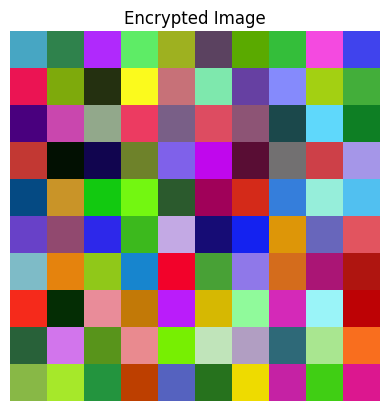

In [20]:
plt.imshow(cv2.cvtColor(x,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Encrypted Image")
plt.show()

In [21]:
#Decryption
n,m,z=0,0,0
kl=0
l=len(text)
decrypt=""
for i in range(l):
  val=0
  for bit_pos in range(8):
    bit= x_enc[n,m,z] & 1
    val=(val << 1) | bit
   # print(f"Reading bit {bit} from ({n},{m},{z})")
    z=(z+1)%3
    if z==0:
      m=m+1
      if m==x_enc.shape[1]:
        m=0
        n=n+1
        if n==x_enc.shape[0]:
          break

  xor_value=val^d[key[kl]]
  if xor_value not in c:
   break
  org_char=c[xor_value]
  decrypt=decrypt+org_char
  print(f"Decrypted byte : {val} XOR {d[key[kl]]} = {val ^ d[key[kl]]} -> '{org_char}'")
  kl=(kl+1)%len(key)
  print("Decrypt text", decrypt)

Decrypted byte : 118 XOR 53 = 67 -> 'C'
Decrypt text C
Decrypted byte : 74 XOR 51 = 121 -> 'y'
Decrypt text Cy
Decrypted byte : 87 XOR 53 = 98 -> 'b'
Decrypt text Cyb
Decrypted byte : 86 XOR 51 = 101 -> 'e'
Decrypt text Cybe
Decrypted byte : 71 XOR 53 = 114 -> 'r'
Decrypt text Cyber
Decrypted byte : 19 XOR 51 = 32 -> ' '
Decrypt text Cyber 
Decrypted byte : 102 XOR 53 = 83 -> 'S'
Decrypt text Cyber S
Decrypted byte : 86 XOR 51 = 101 -> 'e'
Decrypt text Cyber Se
Decrypted byte : 86 XOR 53 = 99 -> 'c'
Decrypt text Cyber Sec
Decrypted byte : 70 XOR 51 = 117 -> 'u'
Decrypt text Cyber Secu
Decrypted byte : 71 XOR 53 = 114 -> 'r'
Decrypt text Cyber Secur
Decrypted byte : 90 XOR 51 = 105 -> 'i'
Decrypt text Cyber Securi
Decrypted byte : 65 XOR 53 = 116 -> 't'
Decrypt text Cyber Securit
Decrypted byte : 74 XOR 51 = 121 -> 'y'
Decrypt text Cyber Security
